No RLR Path
No LRL Path


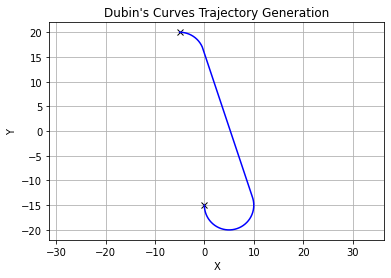

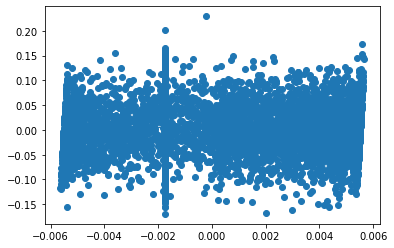

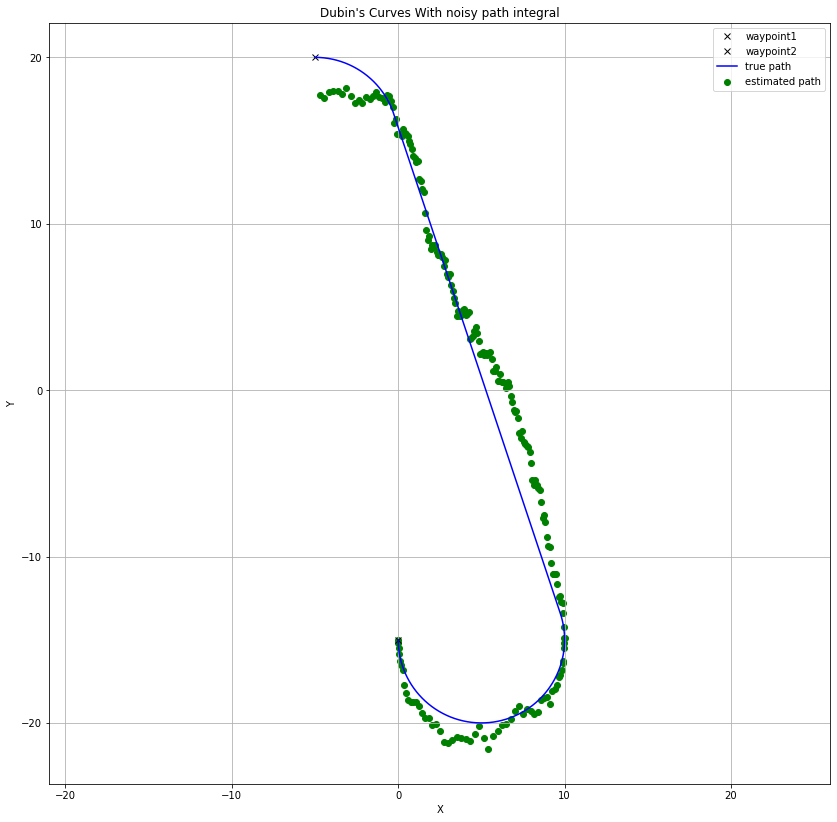

[[-15. -10.]
 [-15.   5.]]


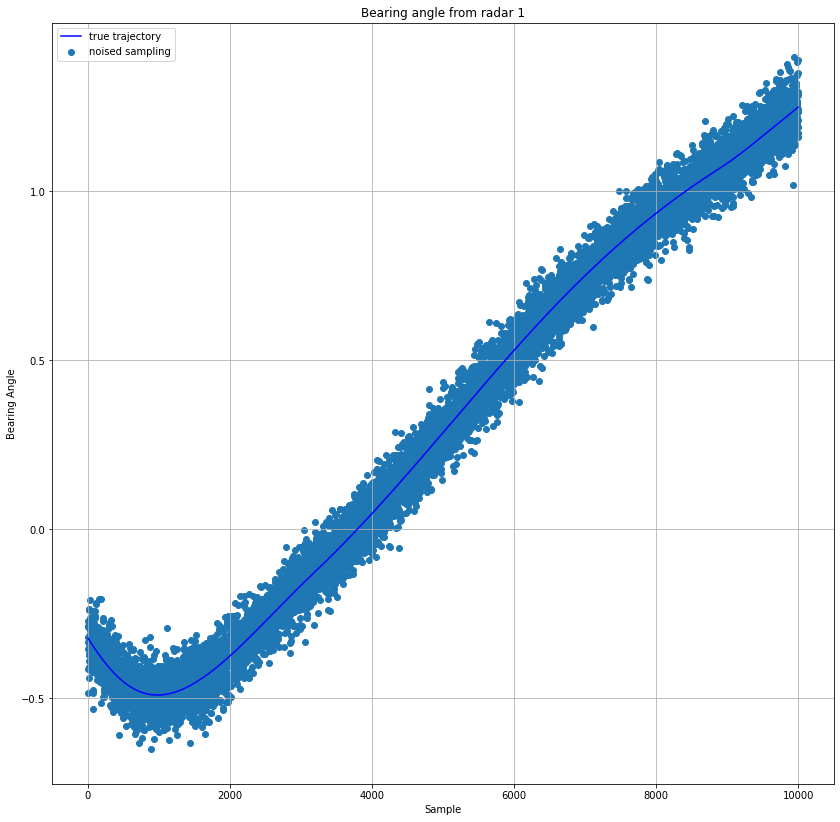

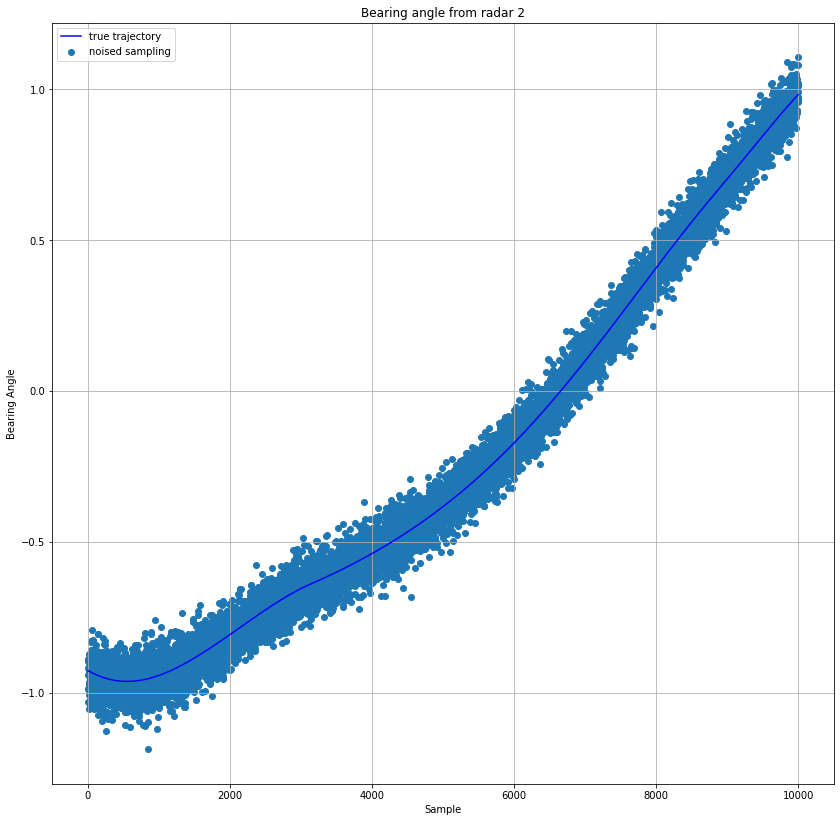

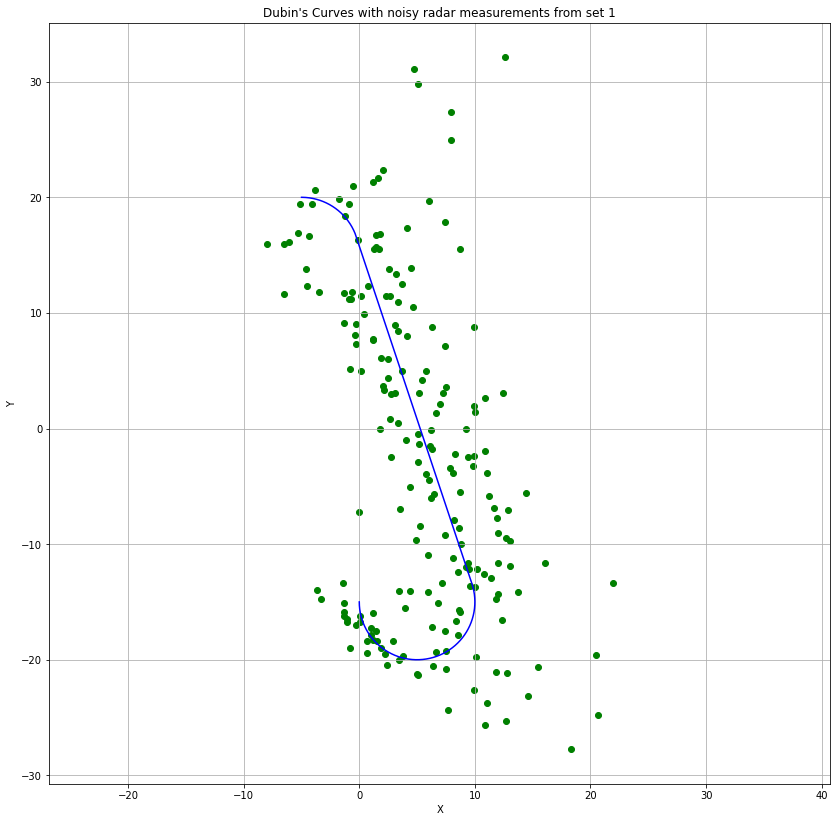

[[-100.  -10.]
 [-100.    5.]]


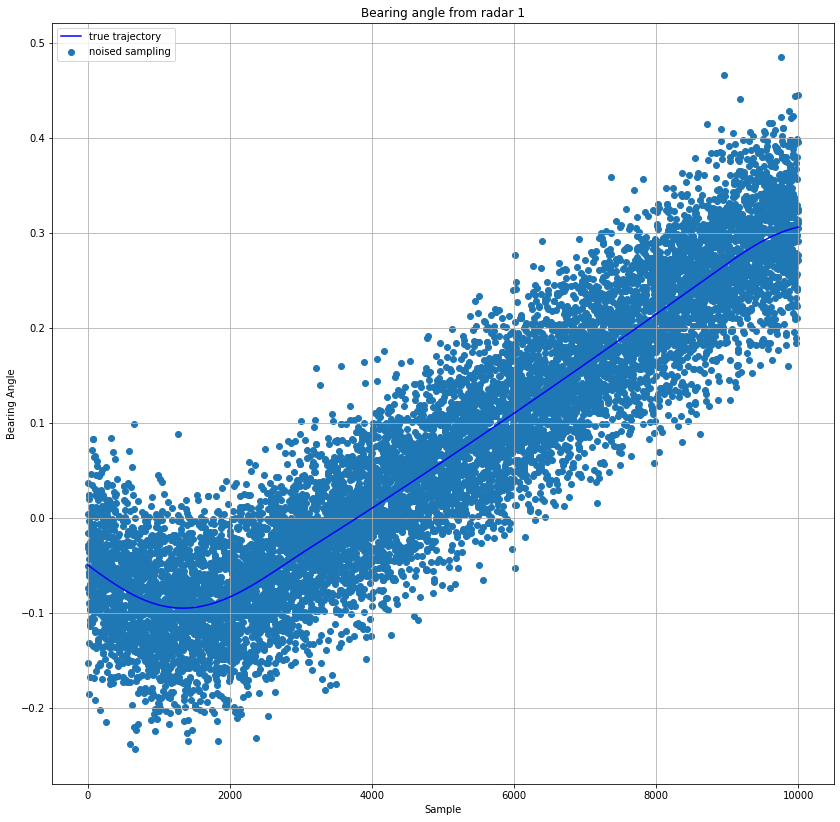

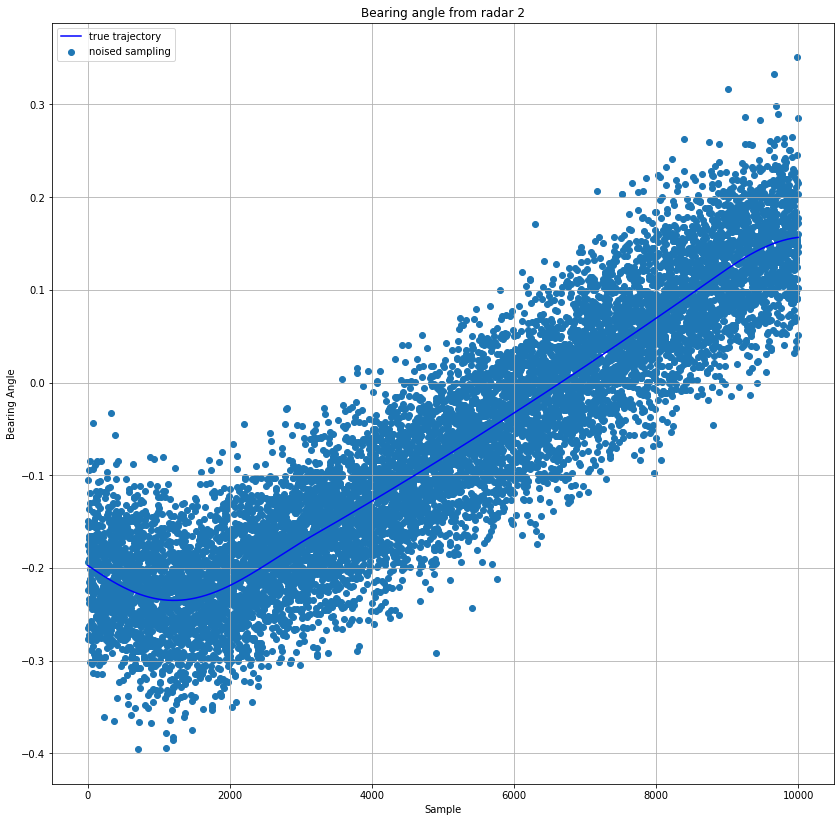

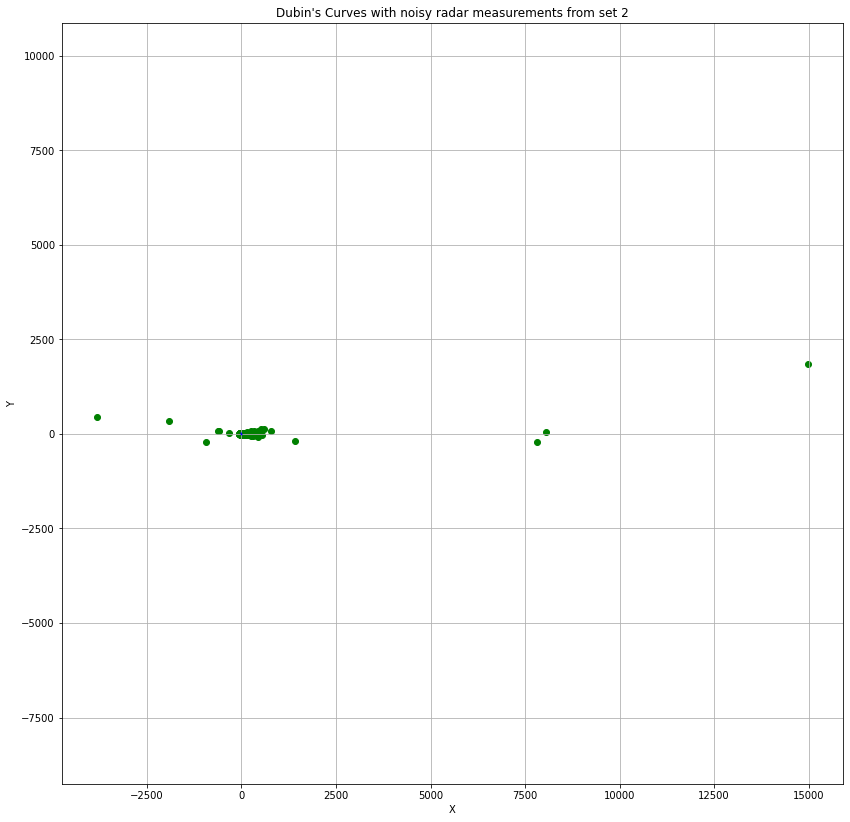

In [1]:
from ECEproj4 import *
turn = 0.01/25
from numpy import matmul as matm
import filterpy

In [2]:
#check previous variables
print(path.shape)    #the true path
print(noise_path.shape)    #the noisy model transition
print(noised_path1.shape)    #the noisy measurement data

(10000, 3)
(10000, 3)
(10000, 3)


In [3]:
#use the f function for discrete nonlinear time
def f_forward(x_k1k1):
    x_kk1 = np.zeros((3,1))
    theta = x_k1k1[2]
    x_kk1[2] = theta
    x_kk1[0] = x_kk1[0]+(0.01*np.cos(theta))
    x_kk1[1] = x_kk1[1]+(0.01*np.sin(theta))
    return x_kk1;
    

In [ ]:
#set up the tuning parameters 
nx = 3
filter_beta = 2
filter_alpha = 0.3
filter_lambda = 